In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
import pandas as pd
import pyodbc
import numpy as np
import random
import string
import mplleaflet

In [21]:
polaczenie = pyodbc.connect("""DRIVER={ODBC Driver 17 for SQL Server};
                            SERVER=analityk.wwsi.edu.pl,50221;
                            DATABASE=synop;
                            uid=student;
                            pwd=ciekawski""") 
zapytanie = """SELECT 
                    dl,
                    szer,
                    nr
               FROM PolskaPunkty """

kontury=pd.read_sql(zapytanie,polaczenie)

C:\Users\Konrad\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [22]:
normaPM25 = 25
normaPM10 = 10

In [23]:
df = pd.read_excel('Zadanie1Smog.xlsx')
print(df)

             Data  Godzina Parametr  Wartosc    SzerGeo    DlugGeo  \
0      2019-09-02        0     PM10  27.8500  52.793122  18.241044   
1      2019-09-02        0     PM10  24.7769  50.972167  14.941319   
2      2019-09-02        0     PM10   7.9492  50.732817  16.648050   
3      2019-09-02        0     PM10   8.6594  50.433493  16.653660   
4      2019-09-02        0     PM10  16.6597  50.942073  17.291333   
...           ...      ...      ...      ...        ...        ...   
452275 2020-02-09       18     PM10  33.3700  50.878998  20.633692   
452276 2020-02-09       18    PM2.5  26.1200  50.878998  20.633692   
452277 2020-02-09       18    PM2.5  30.7245  52.420319  16.877289   
452278 2020-02-09       17     PM10  22.3649  50.675693  18.682065   
452279 2020-02-09       17    PM2.5  18.3834  51.642656  15.127808   

             Miasto          Powiat         Wojewodztwo  
0        Inowrocław   inowrocławski  KUJAWSKO-POMORSKIE  
1        Działoszyn     zgorzelecki        

In [24]:
print(np.unique(np.asarray(df['Parametr'])))
print(np.unique(np.asarray(df['Wojewodztwo'])))

['PM10' 'PM2.5' 'PR10' 'PS25']
['DOLNOŚLĄSKIE' 'KUJAWSKO-POMORSKIE' 'LUBELSKIE' 'LUBUSKIE' 'MAZOWIECKIE'
 'MAŁOPOLSKIE' 'OPOLSKIE' 'PODKARPACKIE' 'PODLASKIE' 'POMORSKIE' 'Silesia'
 'WARMIŃSKO-MAZURSKIE' 'WIELKOPOLSKIE' 'ZACHODNIOPOMORSKIE' 'ŁÓDZKIE'
 'ŚLĄSKIE' 'ŚWIĘTOKRZYSKIE']


In [26]:
df = df.replace('Silesia','ŚLĄSKIE')
df = df.replace('PR10','PM10')
df = df.replace('PS25','PM2.5')

In [27]:
df = df.drop(df[df.Wartosc <0].index)

In [28]:
for index, row in df.iterrows():
    if (row['Parametr'] == 'PM10' and row['Wartosc'] > normaPM10) or (row['Parametr'] == 'PM25' and row['Wartosc'] > normaPM25):
        df.loc[index, 'PrzekroczenieNormy'] = 'TAK'
    else:
        df.loc[index, 'PrzekroczenieNormy'] = 'NIE'

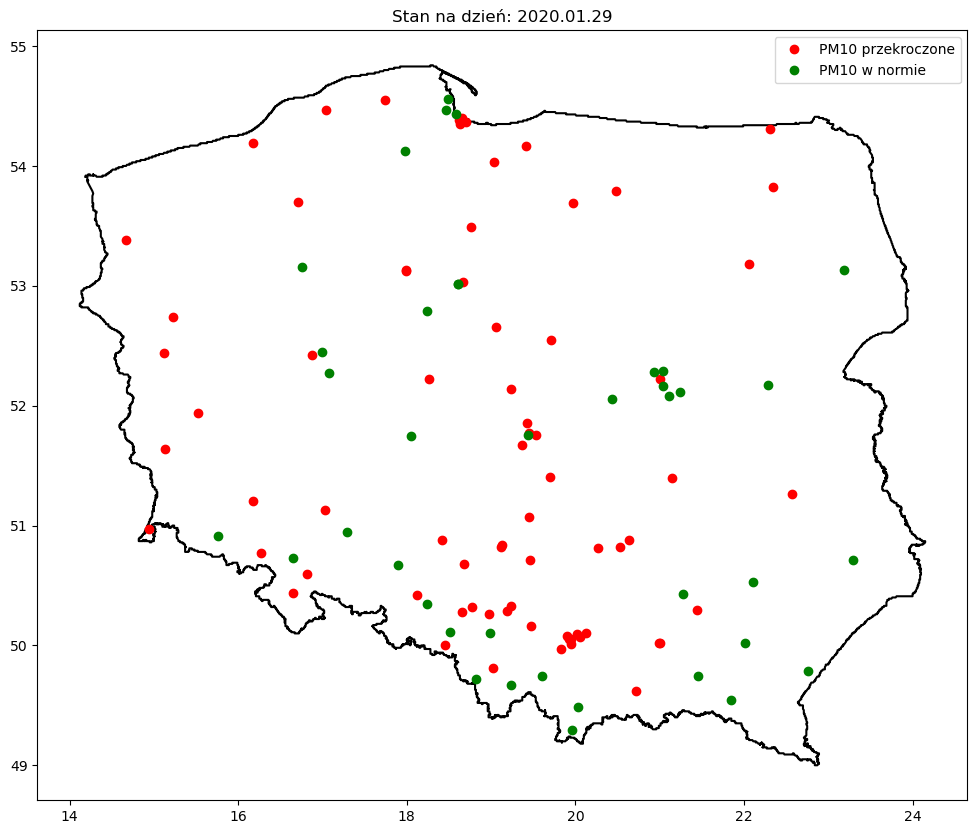

In [32]:
dostepneDni = np.unique(np.asarray(df['Data']))
wybranyDzien = np.random.choice(dostepneDni)
dfDzien = df.loc[df['Data'] == wybranyDzien]

dostepneGodziny = np.unique(np.asarray(dfDzien['Godzina']))
wybranaGodzina = np.random.choice(dostepneGodziny)
dfGodzina = dfDzien.loc[dfDzien['Godzina'] == wybranaGodzina]


dfpm10Tak = dfGodzina.loc[(dfGodzina['Parametr'] == 'PM10') & (dfGodzina['PrzekroczenieNormy'] == 'TAK')]
dfpm10Nie = dfGodzina.loc[(dfGodzina['Parametr'] == 'PM10') & (dfGodzina['PrzekroczenieNormy'] == 'NIE')]


plt.figure(figsize=(12,10))
plt.plot(kontury['dl'], kontury['szer'], color='black')

dl=np.asarray(dfpm10Tak['DlugGeo'])
szer=np.asarray(dfpm10Tak['SzerGeo'])
plt.plot(dl, szer, 'ro', label='PM10 przekroczone')

dl=np.asarray(dfpm10Nie['DlugGeo'])
szer=np.asarray(dfpm10Nie['SzerGeo'])
plt.plot(dl, szer, 'go', label='PM10 w normie')
plt.legend()

ts = pd.to_datetime(str(wybranyDzien)) 
d = ts.strftime('%Y.%m.%d')

plt.title("Stan na dzień: " + d)
plt.show()



In [33]:
dfKrakow = df.loc[(df['Miasto'] == 'Kraków') & (df['Parametr'] == 'PM10'),['Data','Wartosc']]
dfKrakowStatystyka = dfKrakow.groupby(['Data']).mean().reset_index()

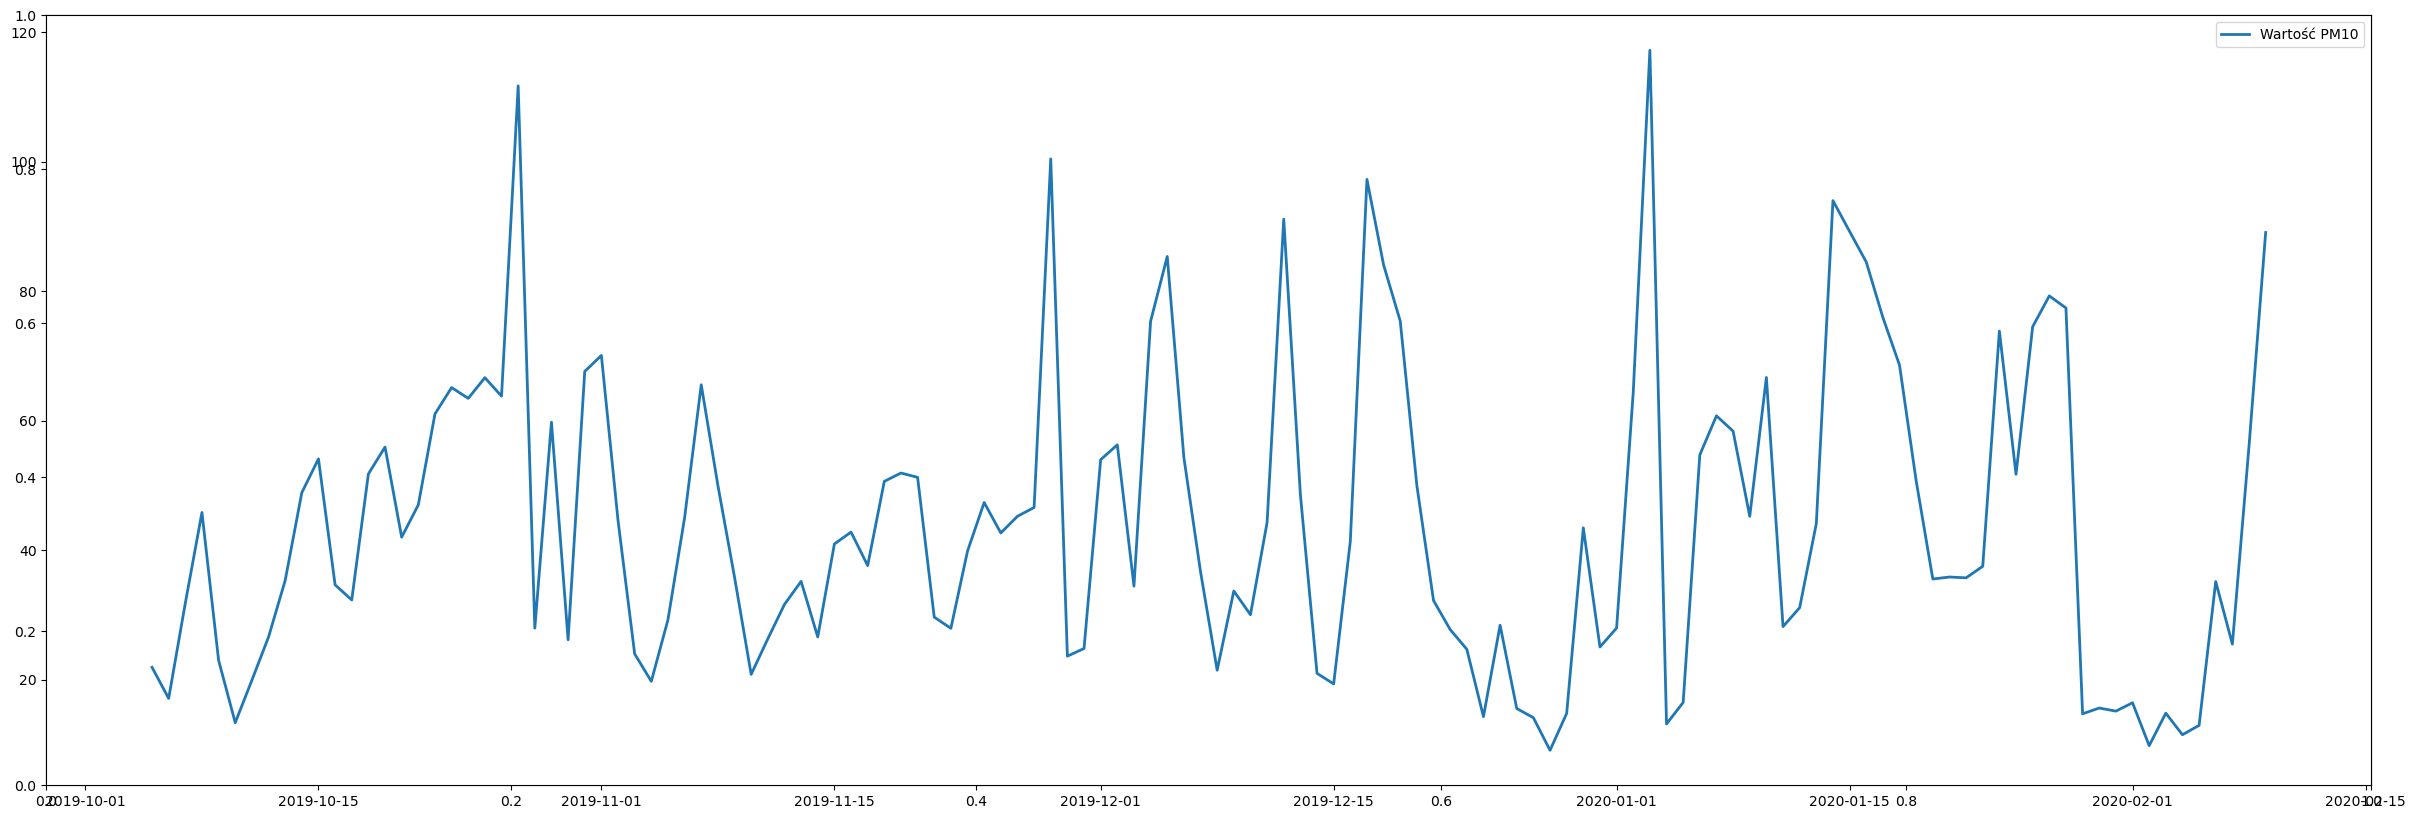

In [35]:
okno,obszary=plt.subplots(figsize=(30,10),dpi=100)
okno.add_subplot(1,1,1)


okno.axes[1].plot(dfKrakowStatystyka['Data'], dfKrakowStatystyka['Wartosc'],lw=2.0, label='Wartość PM10')
okno.axes[1].legend()